In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import cm, colors
import glob

from numba import njit, vectorize, float32

from typing import Callable, Optional, Union

import hoomd
import gsd.hoomd

import sys
import time
import pickle
import gc

import signac

In [3]:
from monk import nb, prep, pair, render, utils, grid
import freud

In [4]:
project: signac.Project = signac.get_project()

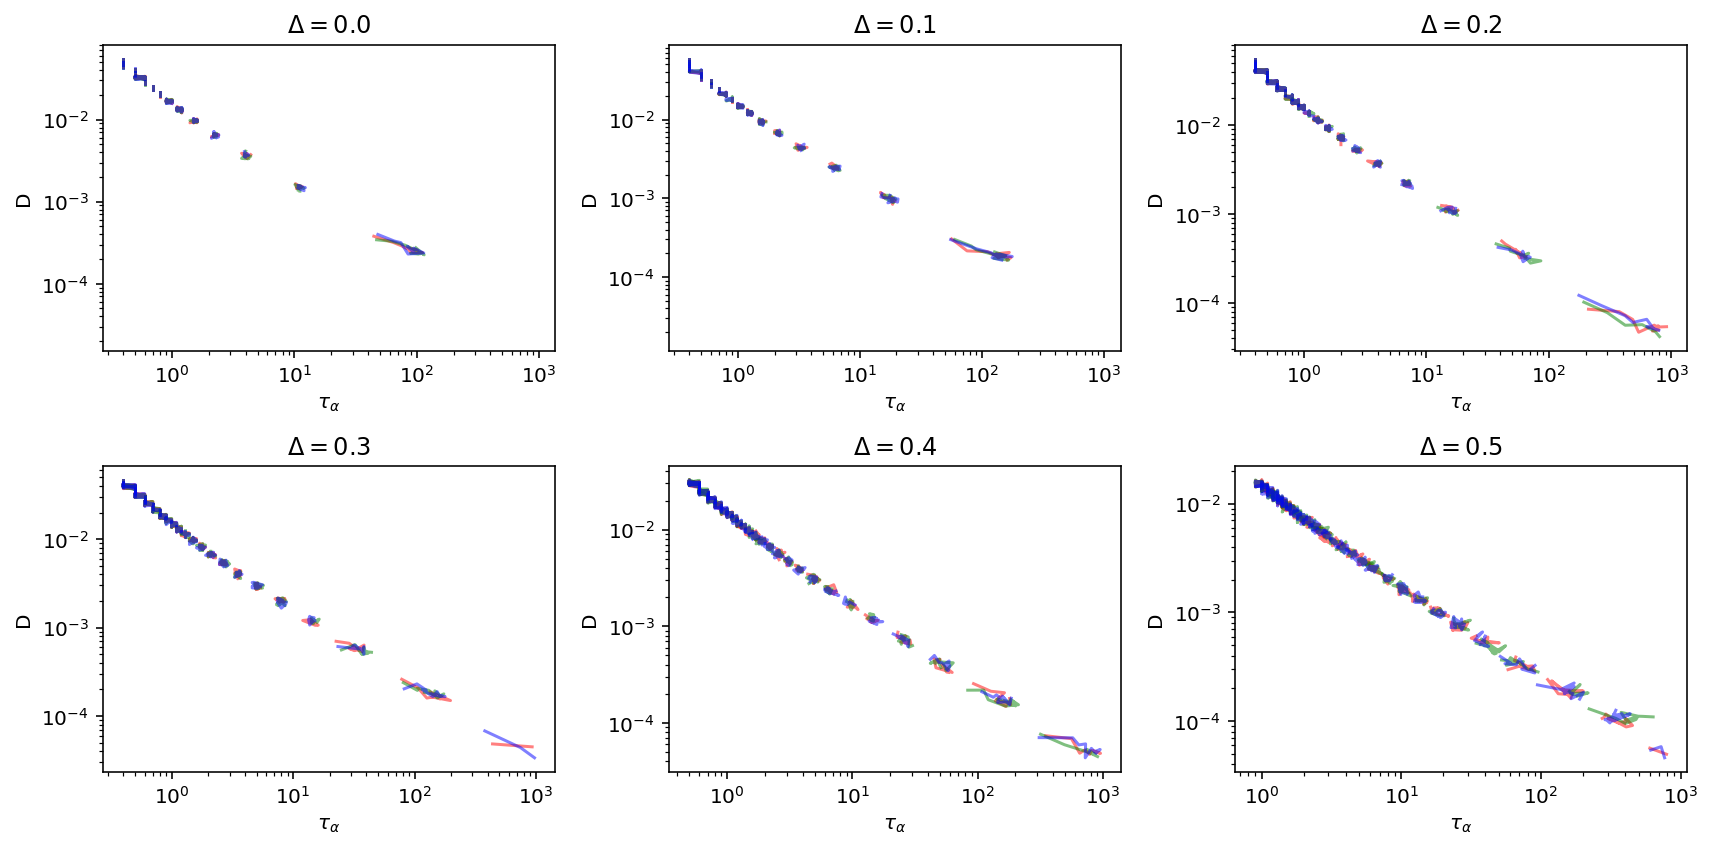

In [66]:
fig, axs = plt.subplots(2, 3, figsize=(12, 6), tight_layout=True)

faxs = axs.flatten()

_colors = ["r", "g", "b"]

for i, job in enumerate(sorted(list(project.__iter__()), key=lambda x: x.sp["seed"])):
    c_idx = job.sp["seed"]//6
    delta = job.sp["delta"]
    ax_idx = int(round(delta / 0.1))
    plt.sca(faxs[ax_idx])

    with job:
        sims = glob.glob("*equil_*.gsd")
        for sim in sims:
            temp_str = utils.extract_between(sim, "equil_", ".gsd")

            with job.data:
                _temp_str = temp_str.replace(".", "_")
                alphas = job.data[f"{_temp_str}/alphas"][:]
                Ds = job.data[f"{_temp_str}/Ds"][:]
            plt.plot(alphas, Ds, color=_colors[c_idx], alpha=0.5)

    plt.title(rf"$\Delta={delta:.1f}$")
    plt.ylabel("D")
    plt.xlabel(r"$\tau_{\alpha}$")
    plt.yscale('log')
    plt.xscale('log')

/tmp/ipykernel_1186682/3382109077.py:34: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "." (-> marker='.'). The keyword argument will take precedence.
  plt.plot(alphas, Ds, ".", color=cmap(norm(delta)), alpha=alpha, marker=marker)


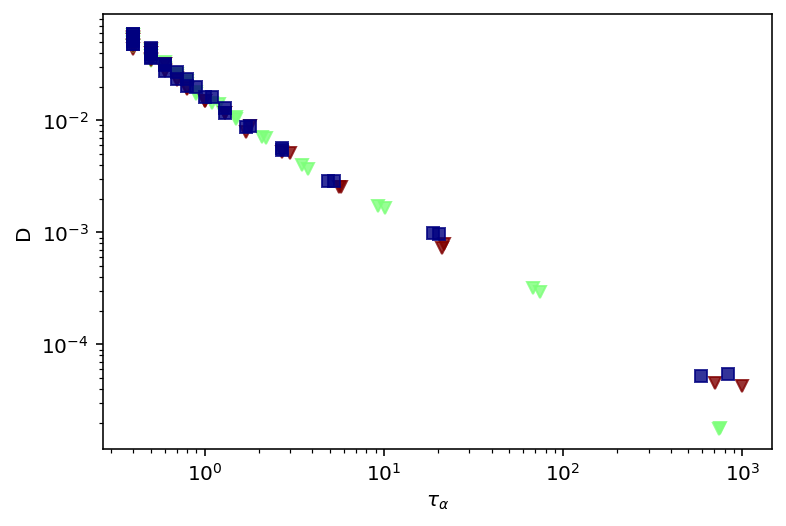

In [9]:

plt.figure()

alpha = .8
cmap = cm.jet
norm = colors.Normalize(vmin=0, vmax=0.66)
markers = {"lj": "o", "wca": "s", "wlj": "v"}

for i, job in enumerate(project.find_jobs({"version": 2})):
    if job.sp["seed"] > 5:
        continue

    marker = markers[job.sp["potential"]]

    pot = job.sp["potential"]
    if pot == "lj":
        # delta = job.sp["phi"]
        continue
    elif pot == "wlj":
        delta = job.sp["epsilon_a"]
    else:
        delta = 0.0

    with job:
        sims = glob.glob("*equil_*.gsd")
        for sim in sims:
            temp_str = utils.extract_between(sim, "equil_", ".gsd")

            with job.data:
                _temp_str = temp_str.replace(".", "_")
                if len(job.data[f"{_temp_str}/alphas"]) == 0:
                    continue
                alphas = job.data[f"{_temp_str}/alphas"][-1]
                Ds = job.data[f"{_temp_str}/Ds"][-1]
            plt.plot(alphas, Ds, ".", color=cmap(norm(delta)), alpha=alpha, marker=marker)

plt.ylabel("D")
plt.xlabel(r"$\tau_{\alpha}$")
plt.yscale('log')
plt.xscale('log')
    

/tmp/ipykernel_1326725/1737317044.py:34: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "." (-> marker='.'). The keyword argument will take precedence.
  plt.plot(float(temp_str), Ds, ".", color=cmap(norm(delta)), alpha=alpha, marker=marker)


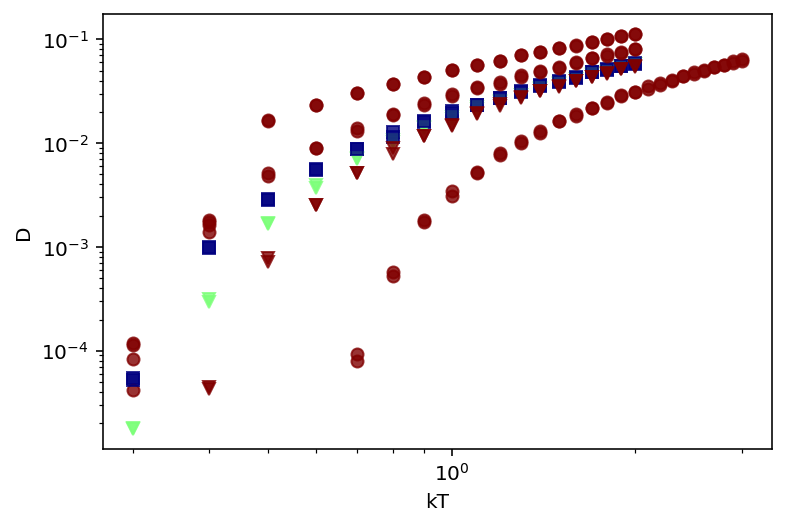

In [6]:

plt.figure()

alpha = .8
cmap = cm.jet
norm = colors.Normalize(vmin=0, vmax=0.66)
markers = {"lj": "o", "wca": "s", "wlj": "v"}

for i, job in enumerate(project.find_jobs({"version": 2})):
    if job.sp["seed"] > 5:
        continue

    marker = markers[job.sp["potential"]]

    pot = job.sp["potential"]
    if pot == "lj":
        delta = job.sp["phi"]
        # continue
    elif pot == "wlj":
        delta = job.sp["epsilon_a"]
    else:
        delta = 0.0

    with job:
        sims = glob.glob("*equil_*.gsd")
        for sim in sims:
            temp_str = utils.extract_between(sim, "equil_", ".gsd")

            with job.data:
                _temp_str = temp_str.replace(".", "_")
                if len(job.data[f"{_temp_str}/alphas"]) == 0:
                    continue
                alphas = job.data[f"{_temp_str}/alphas"][-1]
                Ds = job.data[f"{_temp_str}/Ds"][-1]
            plt.plot(float(temp_str), Ds, ".", color=cmap(norm(delta)), alpha=alpha, marker=marker)

plt.ylabel("D")
plt.xlabel("kT")
plt.yscale('log')
plt.xscale('log')
    

/tmp/ipykernel_1326725/2741284509.py:36: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "." (-> marker='.'). The keyword argument will take precedence.
  plt.plot(float(temp_str), alphas, ".", color=cmap(norm(delta)), alpha=alpha, marker=marker)


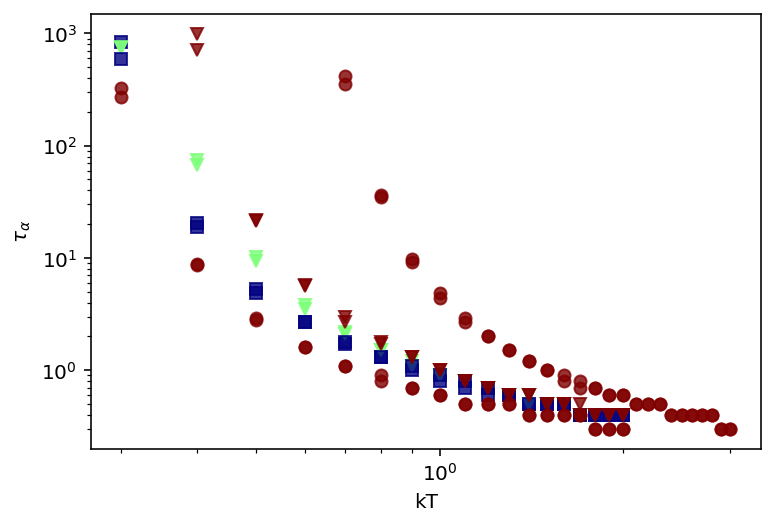

In [12]:

plt.figure()

alpha = .8
cmap = cm.jet
norm = colors.Normalize(vmin=0, vmax=0.66)
markers = {"lj": "o", "wca": "s", "wlj": "v"}

for i, job in enumerate(project.find_jobs({"version": 2})):
    if job.sp["seed"] > 5:
        continue

    marker = markers[job.sp["potential"]]

    pot = job.sp["potential"]
    if pot == "lj":
        delta = job.sp["phi"]
        if delta == 1.0:
            continue
        # continue
    elif pot == "wlj":
        delta = job.sp["epsilon_a"]
    else:
        delta = 0.0

    with job:
        sims = glob.glob("*equil_*.gsd")
        for sim in sims:
            temp_str = utils.extract_between(sim, "equil_", ".gsd")

            with job.data:
                _temp_str = temp_str.replace(".", "_")
                if len(job.data[f"{_temp_str}/alphas"]) == 0:
                    continue
                alphas = job.data[f"{_temp_str}/alphas"][-1]
                Ds = job.data[f"{_temp_str}/Ds"][-1]
            plt.plot(float(temp_str), alphas, ".", color=cmap(norm(delta)), alpha=alpha, marker=marker)

plt.ylabel(r"$\tau_\alpha$")
plt.xlabel("kT")
plt.yscale('log')
plt.xscale('log')
    

/tmp/ipykernel_1186682/721756766.py:38: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "." (-> marker='.'). The keyword argument will take precedence.
  plt.plot(float(temp_str), alphas*Ds, ".", color=color, alpha=alpha, marker=marker)


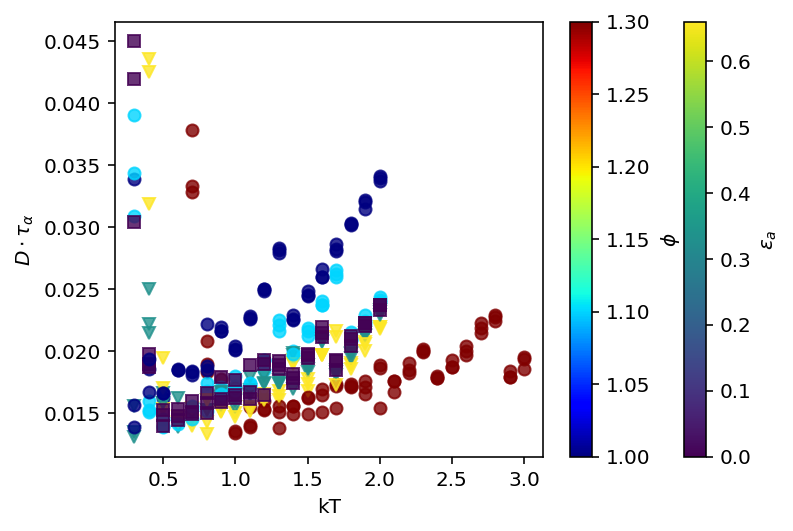

In [17]:

plt.figure()

alpha = .8
cmap = cm.viridis
cmap2 = cm.jet
norm = colors.Normalize(vmin=0, vmax=0.66)
norm2 = colors.Normalize(vmin=1.0, vmax=1.3)
markers = {"lj": "o", "wca": "s", "wlj": "v"}

for i, job in enumerate(project.find_jobs({"version": 2})):
    # if job.sp["seed"] > 5:
    #     continue

    marker = markers[job.sp["potential"]]

    pot = job.sp["potential"]
    if pot == "lj":
        delta = job.sp["phi"]
        color=cmap2(norm2(delta))
    elif pot == "wlj":
        delta = job.sp["epsilon_a"]
        color=cmap(norm(delta))
    else:
        delta = 0.0
        color=cmap(norm(delta))

    with job:
        sims = glob.glob("*equil_*.gsd")
        for sim in sims:
            temp_str = utils.extract_between(sim, "equil_", ".gsd")

            with job.data:
                _temp_str = temp_str.replace(".", "_")
                if len(job.data[f"{_temp_str}/alphas"]) == 0:
                    continue
                alphas = job.data[f"{_temp_str}/alphas"][-1]
                Ds = job.data[f"{_temp_str}/Ds"][-1]
            plt.plot(float(temp_str), alphas*Ds, ".", color=color, alpha=alpha, marker=marker)

plt.ylabel(r"$D \cdot \tau_{\alpha}$")
plt.xlabel("kT")
# plt.yscale('log')
# plt.xscale('log')
    
plt.colorbar(cm.ScalarMappable(norm=norm, cmap=cmap), label=r"$\epsilon_a$")
plt.colorbar(cm.ScalarMappable(norm=norm2, cmap=cmap2), label=r"$\phi$")

/tmp/ipykernel_1186682/3196814729.py:42: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "." (-> marker='.'). The keyword argument will take precedence.
  plt.plot(np.sqrt(float(temp_str))/phi**2, alphas*Ds, ".", color=color, alpha=alpha, marker=marker)


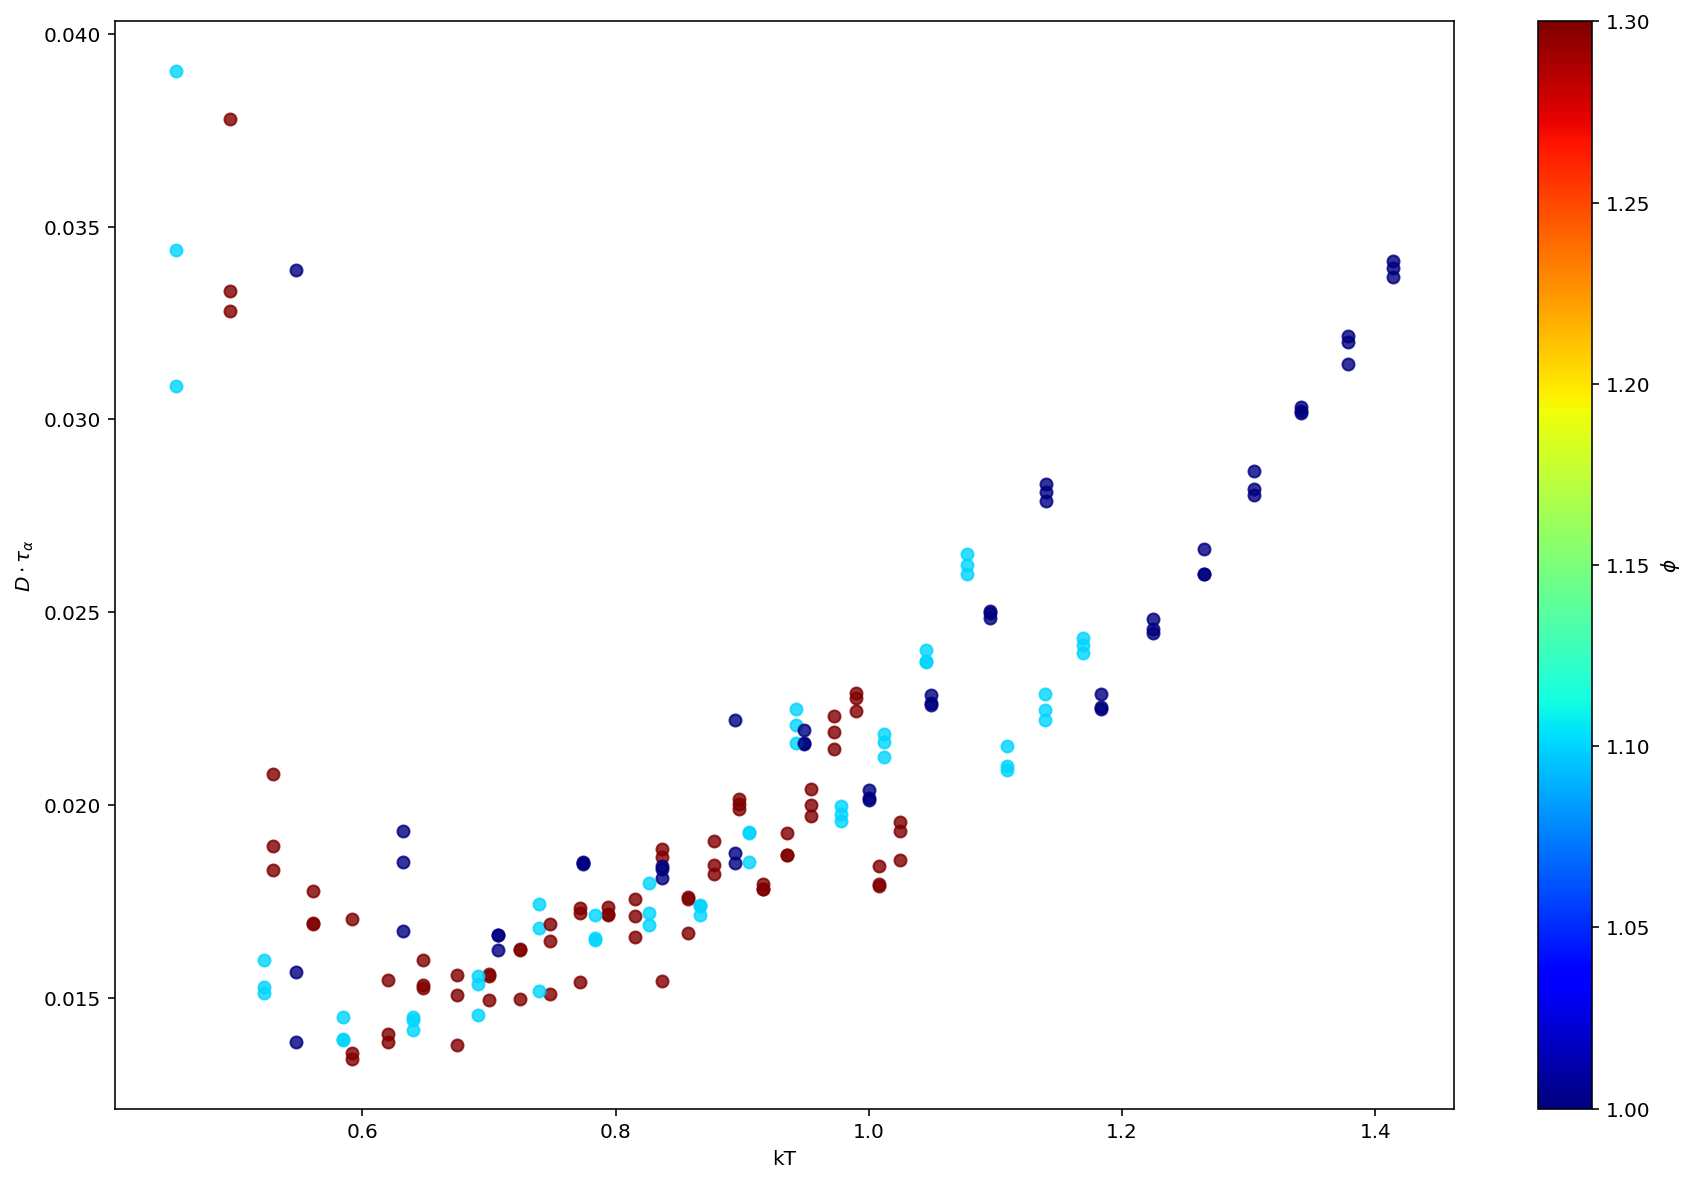

In [25]:

plt.figure(figsize=(15, 10))

alpha = .8
cmap = cm.viridis
cmap2 = cm.jet
norm = colors.Normalize(vmin=0, vmax=0.66)
norm2 = colors.Normalize(vmin=1.0, vmax=1.3)
markers = {"lj": "o", "wca": "s", "wlj": "v"}

for i, job in enumerate(project.find_jobs({"version": 2})):
    # if job.sp["seed"] > 5:
    #     continue

    marker = markers[job.sp["potential"]]

    phi = job.sp["phi"]

    pot = job.sp["potential"]
    if pot == "lj":
        delta = job.sp["phi"]
        color=cmap2(norm2(delta))
    elif pot == "wlj":
        delta = job.sp["epsilon_a"]
        color=cmap(norm(delta))
        continue
    else:
        delta = 0.0
        color=cmap(norm(delta))
        continue

    with job:
        sims = glob.glob("*equil_*.gsd")
        for sim in sims:
            temp_str = utils.extract_between(sim, "equil_", ".gsd")

            with job.data:
                _temp_str = temp_str.replace(".", "_")
                if len(job.data[f"{_temp_str}/alphas"]) == 0:
                    continue
                alphas = job.data[f"{_temp_str}/alphas"][-1]
                Ds = job.data[f"{_temp_str}/Ds"][-1]
            plt.plot(np.sqrt(float(temp_str))/phi**2, alphas*Ds, ".", color=color, alpha=alpha, marker=marker)

plt.ylabel(r"$D \cdot \tau_{\alpha}$")
plt.xlabel("kT")
# plt.yscale('log')
# plt.xscale('log')
    
# plt.colorbar(cm.ScalarMappable(norm=norm, cmap=cmap), label=r"$\epsilon_a$")
plt.colorbar(cm.ScalarMappable(norm=norm2, cmap=cmap2), label=r"$\phi$")